In [1]:
import torch
import numpy as np 
import matplotlib.pyplot as plt
import spatial_maps as sm
import scipy

from tqdm import tqdm
from models import FFGC, RNNGC
from plotting_functions import *
from dataset import DatasetMaker

In [3]:
## Training parameters
train_steps = 50000
timesteps = 10
bs = 64 # batch size

# Model parameters
ng = 256 # no. of recurrent units
alpha = 0.88

In [4]:
# instantiate RNN model
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model = RNNGC(ng = ng, alpha = alpha)
model = model.load("./best_models/RNNGC.pkl")

model.to(device)
optimizer = torch.optim.Adam(model.parameters(), lr = 1e-3)

c:\Users\kingt\anaconda3\envs\torch2\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


[-1.6347659 +0.j         -1.5622694 +0.j         -1.1504403 +0.j
 -0.6383324 +0.j         -0.60280526-2.2058995j  -0.60280526+2.2058995j
 -0.5850972 -2.331507j   -0.5850972 +2.331507j   -0.52107364-0.55157137j
 -0.52107364+0.55157137j -0.4722764 -1.6910738j  -0.4722764 +1.6910738j
 -0.38032633-2.0131385j  -0.38032633+2.0131385j  -0.35290393-0.33404943j
 -0.35290393+0.33404943j -0.35133862-0.22279844j -0.35133862+0.22279844j
 -0.34653232-1.5753502j  -0.34653232+1.5753502j  -0.33983016+0.j
 -0.29662737-2.443112j   -0.29662737+2.443112j   -0.20778307-0.2936617j
 -0.20778307+0.2936617j  -0.12107147-0.08948211j -0.12107147+0.08948211j
 -0.10392409-0.28230548j -0.10392409+0.28230548j -0.09934612+0.j
 -0.08821788-0.504132j   -0.08821788+0.504132j   -0.06360812-0.65137017j
 -0.06360812+0.65137017j  0.01703642-0.31510472j  0.01703642+0.31510472j
  0.06797212+0.j          0.07944098-0.54689854j  0.07944098+0.54689854j
  0.09404531-0.14874138j  0.09404531+0.14874138j  0.11714955+0.j
  0.1224815 -

c:\Users\kingt\anaconda3\envs\torch2\lib\site-packages\matplotlib\cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Users\kingt\anaconda3\envs\torch2\lib\site-packages\numpy\lib\histograms.py:852: ComplexWarning: Casting complex values to real discards the imaginary part
  indices = f_indices.astype(np.intp)
c:\Users\kingt\anaconda3\envs\torch2\lib\site-packages\matplotlib\axes\_axes.py:6862: ComplexWarning: Casting complex values to real discards the imaginary part
  bins = np.array(bins, float)  # causes problems if float16


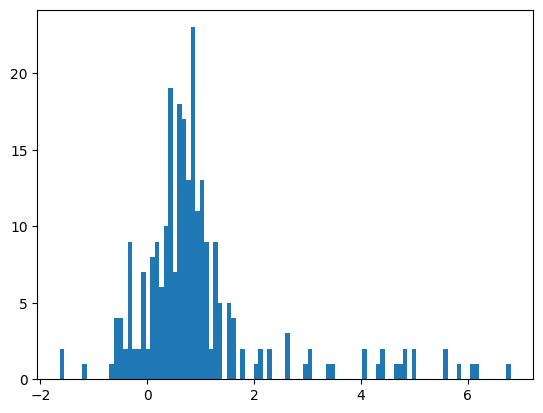

In [30]:
# Reccurent matrix of the model
W = model.gg.weight.data.cpu().numpy()

# Find eigenvalues of the recurrent matrix
eigvals = np.linalg.eigvals(W)
eigvals = np.sort(eigvals)
print(eigvals)
plt.hist(eigvals, bins = 100)
plt.show()

[1.8908602e+01 1.8623907e+01 1.8457537e+01 1.8033463e+01 1.7755604e+01
 1.7629253e+01 1.1374078e+01 6.6078396e+00 6.3093967e+00 6.2168093e+00
 5.8943305e+00 5.8368821e+00 5.6895547e+00 5.6262460e+00 5.1750345e+00
 5.0160894e+00 4.8583484e+00 4.6922588e+00 4.6266165e+00 4.2077470e+00
 4.1385460e+00 4.0243430e+00 3.9315648e+00 3.8747430e+00 3.7690067e+00
 3.7065618e+00 3.6597111e+00 3.6075134e+00 3.5043423e+00 3.4698365e+00
 3.3816376e+00 3.3135622e+00 3.2020729e+00 3.1594961e+00 3.0643303e+00
 3.0319531e+00 3.0017698e+00 2.9488165e+00 2.8558569e+00 2.8374751e+00
 2.7926426e+00 2.7695520e+00 2.7078631e+00 2.6406994e+00 2.5855138e+00
 2.5420489e+00 2.4936371e+00 2.4240024e+00 2.4074280e+00 2.3393905e+00
 2.2753603e+00 2.2133236e+00 2.1975167e+00 2.1832907e+00 2.1518457e+00
 2.1236105e+00 2.0700765e+00 2.0603175e+00 2.0108199e+00 1.9462196e+00
 1.9159752e+00 1.8815831e+00 1.8493646e+00 1.8326041e+00 1.7868619e+00
 1.7555929e+00 1.7247193e+00 1.7078495e+00 1.6974382e+00 1.6770306e+00
 1.658

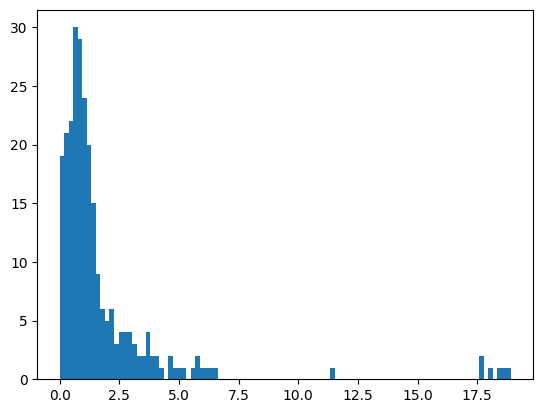

In [24]:
# Singular value decomposition
U, S, V = np.linalg.svd(W)
print(S)
plt.figure()
plt.hist(S, bins=100)
plt.show()